# **Aula 09 - Deep Learning - Redes Convolucionais**

## **Objetivos**

* Conhecer e praticar Redes Neurais Convolucionais
* Conhecer uma intuição sobre Convolução, Pooling
* Praticar a classificação de objeto usando Keras/TensorFlow

## **Definição do Problema**

Desenvolver um **Modelo de Rede Neural Artificial do tipo Multilayer**, capaz de classificar os algarismos escritos a mão com base nas suas características. Para isso vamos usar o dataset MNIST (https://www.kaggle.com/datasets/hojjatk/mnist-dataset).

Esse dataset contém 70.000 algarismos, separadas em dez classes diferentes indo de 0 a 9.

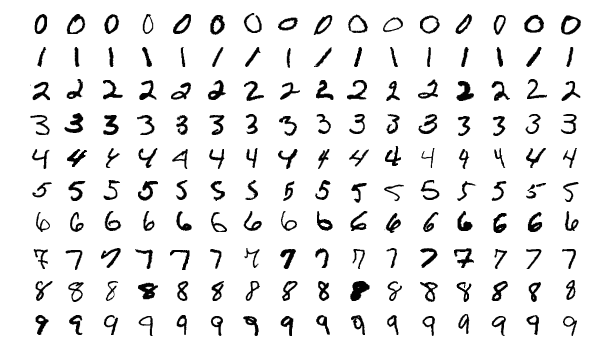

## **Roteiro**

### **1** - Carregando as Bibliotecas

In [ ]:
# Importar as bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **2** - Carregando o Dataset

In [ ]:
# Carrega o dataset
mnist = keras.datasets.mnist
# Carrega os dados de treino e teste
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### **3** - Explorando o Dataset

In [ ]:
# Mostra as caracteristicas do dataset
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


### **4 - Analisando os dados**

0


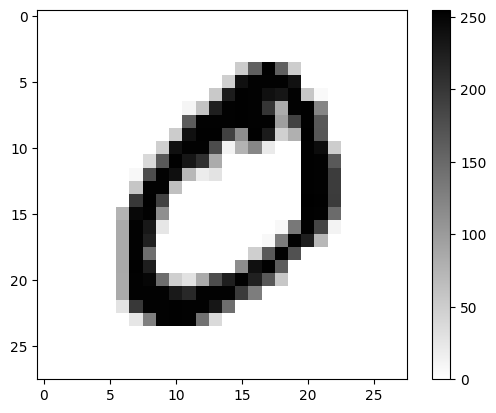

In [ ]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])

0


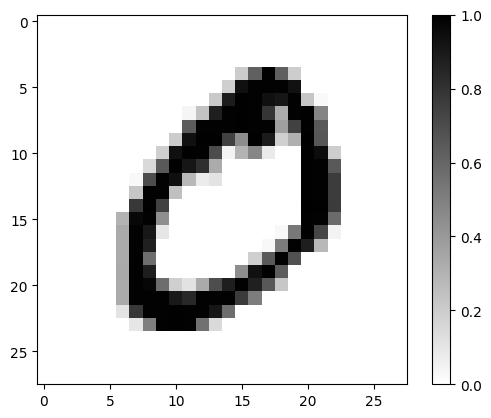

In [ ]:
# Normalizando a escala de cinza para ficar entre 0 e 1
train_images = train_images/255
test_images = test_images/255
plt.figure()
plt.imshow(train_images[1], cmap = 'binary')
plt.colorbar()
print(train_labels[1])


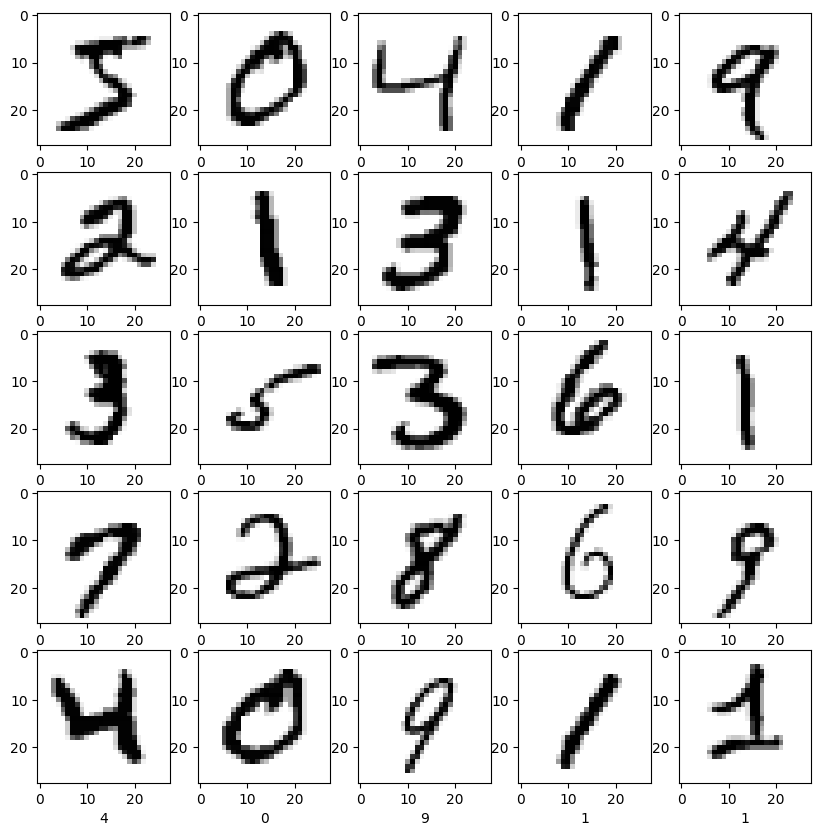

In [ ]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap = 'binary')
  plt.xlabel(train_labels[i])

### **5 - Criando o Modelo**

Como estamos lidando com uma imagem, ela pode ser descrita matemáticamente como uma matriz de 28x28, o que resulta em 784 pixels.

Cada um desses pixels entrará em um neurônio na nossa rede, por isso precisamos transformar essa matriz em um vetor:

<img src ="https://raw.githubusercontent.com/arnaldojr/DisruptiveArchitectures/master/material/aulas/lab08/flatten.png">

Para isso, usamos o método FLATTEN()

In [ ]:
# Criando o modelo com keras
model = keras.Sequential([
    # Camada de entrada Flatten para transformar a matriz de 28x28 para um vetor de 784
    keras.layers.Flatten(input_shape=(28,28)),
    # Camada Oculta Densa (totalmente conectada) de 64 neuronios, com funçao de ativação Relu
    keras.layers.Dense(64, activation = tf.nn.relu),
    # Camada de saida Densa de 10 neuronios, com funçao de ativaçao softmax
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### **6 - Compilando o Modelo**

In [ ]:
# Compila o modelo com fuçao Loss e metrica de acuracia
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostra o modelo compilado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### **7 - Treinando o Modelo**

In [ ]:
# Treina o modelo, com 5 épocas
epochs_hist = model.fit(train_images, train_labels, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3020 - accuracy: 0.9134
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1540 - accuracy: 0.9544
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1161 - accuracy: 0.9659
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0957 - accuracy: 0.9711
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0825 - accuracy: 0.9761
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0731 - accuracy: 0.9791
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9816
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0612 - accuracy: 0.9826
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0544 - accuracy: 0.9841
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.050

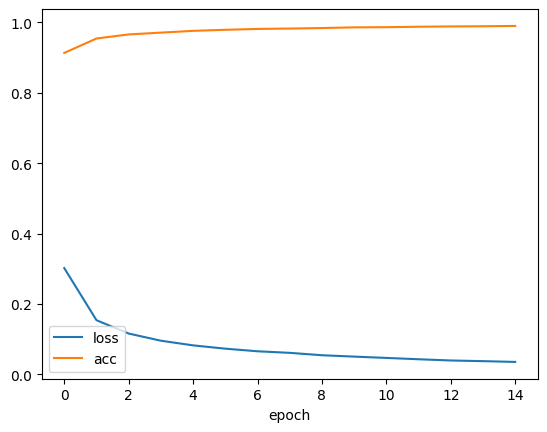

In [ ]:
history_df = pd.DataFrame(epochs_hist.history)

plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

## **8 - Testando o Modelo**

In [ ]:
# Testa e mostra as métricas
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9752
0.10586132854223251
0.9751999974250793


Neste caso, como foi a acuracia do nosso modelo? Ele aprendeu bem a classificar os algarismos?

# **CNN - Redes Neurais Convulocionais**

## **Definição do Problema**

Desenvolver um **Modelo de Rede Neural Convolucional**, capaz de classificar as imagens do dataset Fashion MNIST. (https://www.kaggle.com/datasets/zalando-research/fashionmnist)

### **1** - Carregando as Bibliotecas

In [1]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

### **2** - Carregando o Dataset

In [2]:
# Importando o dataset
from keras.datasets import fashion_mnist

# Carregar o conjunto de dados
(imagem_treino, classe_treino), (imagem_teste, classe_teste) = fashion_mnist.load_data()

# Mostra as caracteristicas do dataset
print(imagem_treino.shape)
print(np.unique(classe_treino))

print(imagem_teste.shape)
print(np.unique(classe_teste))

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


As imagens de treino possuem 50 mil imagens, sendo 32 x 32 Pixels, 3 canais de cor (RGB)

As classes de treino vão de 0 a 9, totalizando 10 Classes.

0


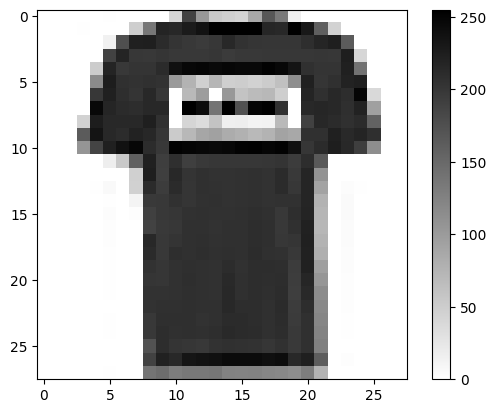

In [3]:
# Exibe uma amostra do dataset
plt.figure()
plt.imshow(imagem_treino[1], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

### **3 - Processando os dados**

Vamos normalizar o range de cores. O RGB assume valores de 0 a 255. Vamos Normaliza-lo para ficar entre 0 e 1. Para isso, podemos dividr as imagens por 255

In [4]:
# Normalizando a escala para ficar entre 0 e 1
imagem_treino = imagem_treino/255
imagem_teste = imagem_teste/255

0


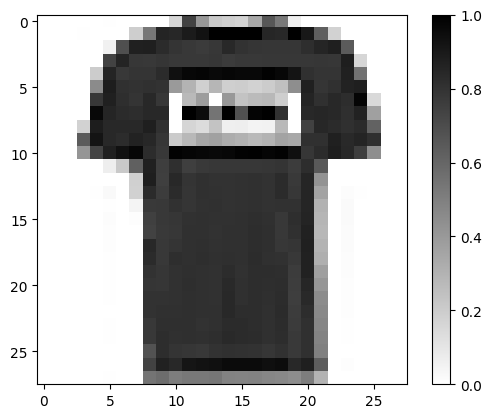

In [5]:
plt.figure()
plt.imshow(imagem_treino[1], cmap = 'binary')
plt.colorbar()
print(classe_treino[1])

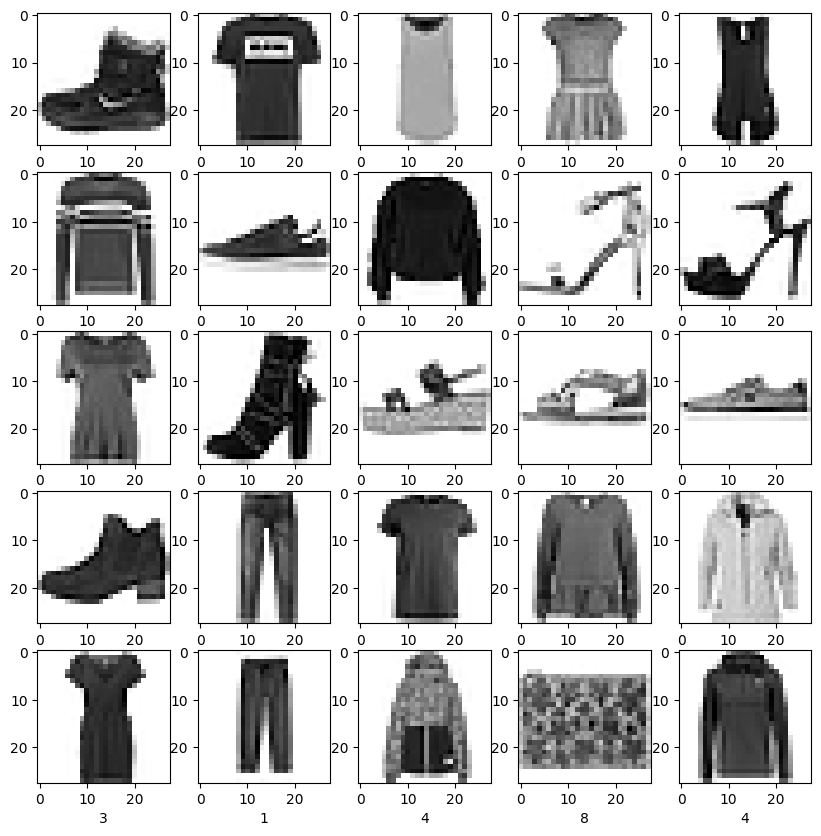

In [6]:
# Mostrando o dataset normalizado
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(imagem_treino[i], cmap = 'binary')
  plt.xlabel(classe_treino[i])

### **4 - Criando o Modelo**

In [10]:
# Criando um modelo de rede neural sequencial.
model2 = keras.Sequential()

# Adiciona uma camada de convolução 2D com 32 filtros de tamanho 5x5, que usa a função de ativação ReLU
# e tem uma entrada de imagem 2D com altura e largura de 28 pixels e 1 canal de cor - Escala de cinza
model2.add( keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                                activation ='relu', input_shape=(28,28,1)) )

# Adiciona uma camada de max pooling 2D que reduz a dimensão da imagem de entrada pela metade
# (em ambas as direções - altura e largura) usando uma janela de 2x2 pixels e um passo de 2 pixels.
# A camada é adicionada à rede neural após a camada de convolução, o que ajuda a reduzir o número
# de parâmetros e a extrair as características mais importantes da imagem.
model2.add( keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

# Transforma a imagem no formato de "matriz" em um vetor
model2.add(keras.layers.Flatten())

# Adiciona uma camada de 128 neuronios totalmente conectados (Densa) com função de ativação ReLU
model2.add(keras.layers.Dense(128, activation='relu'))

# Adiciona uma camada de 10 neurônios totalmente conectados (Densa), que calcula
# as probabilidades de cada classe usando a função softmax.
model2.add(keras.layers.Dense(10, activation='softmax'))

### **5 - Compilando o Modelo**

In [11]:
# Compila o modelo model2 com o otimizador Adam, a função de perda de entropia cruzada categórica esparsa
# e a métrica de acurácia. O modelo agora está pronto para ser treinado.
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Vamos mostrar como ficou a rede
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805,066
Trainable params: 805,066
Non-trainable params: 0
________________________________________________

### **6 - Treinando o Modelo**

In [12]:
# Treinando nosso modelo!
epochs_hist = model2.fit(imagem_treino, classe_treino, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.3911 - accuracy: 0.8591
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2181 - accuracy: 0.9193
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1841 - accuracy: 0.9316
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1557 - accuracy: 0.9419
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1328 - accuracy: 0.9501
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1135 - accuracy: 0.9581
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0942 - accuracy: 0.9654
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0804 - accuracy: 0.9703
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

Vamos plotar um gráfico da Loss e da Acuracy

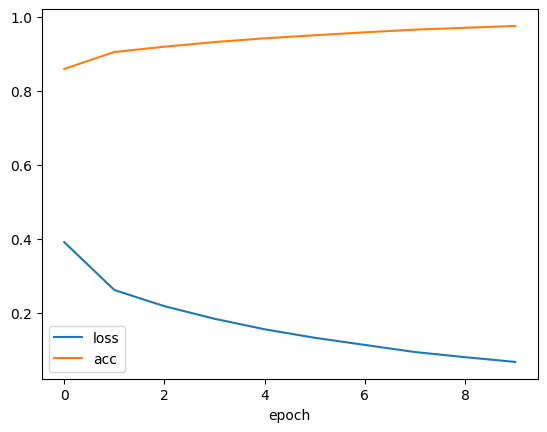

In [13]:
history_df = pd.DataFrame(epochs_hist.history)

plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='lower left')
plt.show()

### **7 - Testando o Modelo**

In [14]:
# Testando o Modelo
test_loss, test_acc = model2.evaluate(imagem_teste, classe_teste)

print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.9160
0.33628609776496887
0.9160000085830688


Por que obtivemos as Loss e Acuracia acima?

### **8 - Colocando o Modelo a Prova**

In [16]:
# Funções para facilitar a visualização
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label == true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                       100*np.max(predictions_array),
                                       true_label,
                                       color = color))

def plot_value_array(i, predictions_array, true_label):
   predictions_array, true_label = predictions_array[i], true_label[i].item()
   plt.grid(False)
   plt.xticks(range(10),range(10))
   plt.yticks([])
   thisplot = plt.bar(range(10), predictions_array, color = "#77777777")
   plt.ylim([0,1])
   predicted_label = np.argmax(predictions_array)

   thisplot[predicted_label].set_color('red')
   thisplot[true_label].set_color('blue')

In [17]:
# Vamos verificar quais as imagens que o nosso modelo errou
predictions = model2.predict(imagem_teste)

313/313 [==============================] - 1s 2ms/step


In [21]:
for i in range(50):
  if(np.argmax(predictions[i]) != classe_teste[i]):
    print(i)

6
12
23
25
40
42
43


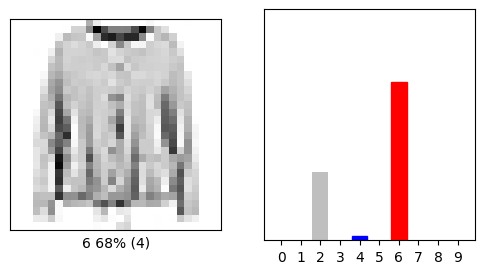

In [24]:
# Agora vamos avaliar as imagens que ele errou
i = 25 # Substitua por um dos indices apontados na celula anterior
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, classe_teste, imagem_teste[:,:,:])
plt.subplot(1,2,2)
plot_value_array(i, predictions, classe_teste)

# **Exercício**

Implemente a arquitetura da rede LeNet-5. Para treinar o Fashion MNIST.

A leNet-5 foi publicada por leCun em 1998. E é composta basicamente por:

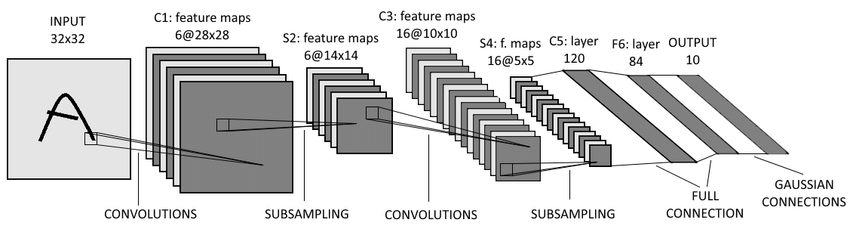

* Convolutional Layers (CONV);
* Pooling Layers (POOL);
* Fully-Connected Layers (FC).

Um exemplo de aplicação: https://github.com/gary30404/convolutional-neural-network-from-scratch-python